### 1. 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [3]:
df_adult = pd.read_csv('/Users/anany/OneDrive/Desktop/SEM2/6302-machine learning/adult.csv')
df_adult.head()



,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df_adult.dtypes # to check the datatypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [6]:
print(df_adult.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


#### there are no missing values.

In [ ]:
# Checking the distribution of the target variable 'income'
class_low = df_adult[df_adult['income'] == '<=50K']  
class_high = df_adult[df_adult['income'] == '>50K']  

# Print the class distribution
print("Income <=50K:", class_low.shape)
print("Income >50K:", class_high.shape)

Income <=50K: (24720, 15)
Income >50K: (7841, 15)


#### Income <= 50K is the majority class and Income >50K is the minority class. This indicates the class imbalance present in the dataset.

In [ ]:
# Encoding the categorical features
categorical_columns = df_adult.select_dtypes(include=["object"]).columns
encoder = LabelEncoder()
for col in categorical_columns:
    df_adult[col] = encoder.fit_transform(df_adult[col])

#### Algorithms like logistic regression, random forest, XGBoost cannot handle categorical data so categorical data must be converted to numbers.
#### This encoding converts columns like male/female to 0/1 preventing causing issues with model training ensuring consistency in data processing
#### It also improves model performance. like in case of tree based modelss.

In [6]:
# Split features and target variable
X = df_adult.drop(columns=["income"])
y = df_adult["income"]

In [7]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [8]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# function to train and evaluate models
def train_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, zero_division=1), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

In [14]:
# evaluating model performance of imbalanced data
acc_lr, prec_lr, rec_lr, f1_lr = train_evaluate(LogisticRegression(), X_train, y_train, X_test, y_test) # logistic regression
acc_rf, prec_rf, rec_rf, f1_rf = train_evaluate(RandomForestClassifier(), X_train, y_train, X_test, y_test) # randomforest



              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4945
           1       0.72      0.46      0.56      1568

    accuracy                           0.83      6513
   macro avg       0.78      0.70      0.73      6513
weighted avg       0.82      0.83      0.81      6513

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4945
           1       0.74      0.62      0.67      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513



In [16]:
# Hnadling the class imbalance using SMOTE - Oversampling Technique
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Tomek links - Undersampling technique
tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

In [17]:
# training and evaluating models after handling imbalance
# following is the model performance after SMOTE Oversampling.
acc_lr_smote, prec_lr_smote, rec_lr_smote, f1_lr_smote = train_evaluate(LogisticRegression(), X_train_smote, y_train_smote, X_test, y_test)
acc_rf_smote, prec_rf_smote, rec_rf_smote, f1_rf_smote = train_evaluate(RandomForestClassifier(), X_train_smote, y_train_smote, X_test, y_test)


              precision    recall  f1-score   support

           0       0.92      0.78      0.84      4945
           1       0.52      0.78      0.63      1568

    accuracy                           0.78      6513
   macro avg       0.72      0.78      0.73      6513
weighted avg       0.82      0.78      0.79      6513

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4945
           1       0.67      0.70      0.68      1568

    accuracy                           0.85      6513
   macro avg       0.79      0.79      0.79      6513
weighted avg       0.85      0.85      0.85      6513



In [18]:
# logistic regression and random forest after Tomek Undersampling
acc_lr_tomek, prec_lr_tomek, rec_lr_tomek, f1_lr_tomek = train_evaluate(LogisticRegression(), X_train_tomek, y_train_tomek, X_test, y_test)
acc_rf_tomek, prec_rf_tomek, rec_rf_tomek, f1_rf_tomek = train_evaluate(RandomForestClassifier(), X_train_tomek, y_train_tomek, X_test, y_test)


              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4945
           1       0.69      0.51      0.59      1568

    accuracy                           0.83      6513
   macro avg       0.77      0.72      0.74      6513
weighted avg       0.82      0.83      0.82      6513

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      4945
           1       0.70      0.68      0.69      1568

    accuracy                           0.85      6513
   macro avg       0.80      0.79      0.80      6513
weighted avg       0.85      0.85      0.85      6513



In [24]:
metrics_df = pd.DataFrame({
    "Model": ["Logistic Regression (Imbalanced)", "Random Forest (Imbalanced)",
              "Logistic Regression (SMOTE)", "Random Forest (SMOTE)",
              "Logistic Regression (Tomek Links)", "Random Forest (Tomek Links)"],
    "Accuracy": [acc_lr, acc_rf, acc_lr_smote, acc_rf_smote, acc_lr_tomek, acc_rf_tomek],
    "Precision": [prec_lr, prec_rf, prec_lr_smote, prec_rf_smote, prec_lr_tomek, prec_rf_tomek],
    "Recall": [rec_lr, rec_rf, rec_lr_smote, rec_rf_smote, rec_lr_tomek, rec_rf_tomek],
    "F1 Score": [f1_lr, f1_rf, f1_lr_smote, f1_rf_smote, f1_lr_tomek, f1_rf_tomek]
})
print(metrics_df)

                               Model  Accuracy  Precision    Recall  F1 Score
0   Logistic Regression (Imbalanced)  0.826808   0.722672  0.455357  0.558685
1         Random Forest (Imbalanced)  0.854906   0.735094  0.621173  0.673349
2        Logistic Regression (SMOTE)  0.776447   0.524096  0.776786  0.625899
3              Random Forest (SMOTE)  0.845540   0.673243  0.696429  0.684639
4  Logistic Regression (Tomek Links)  0.827576   0.692975  0.509566  0.587284
5        Random Forest (Tomek Links)  0.853063   0.700855  0.679847  0.690191


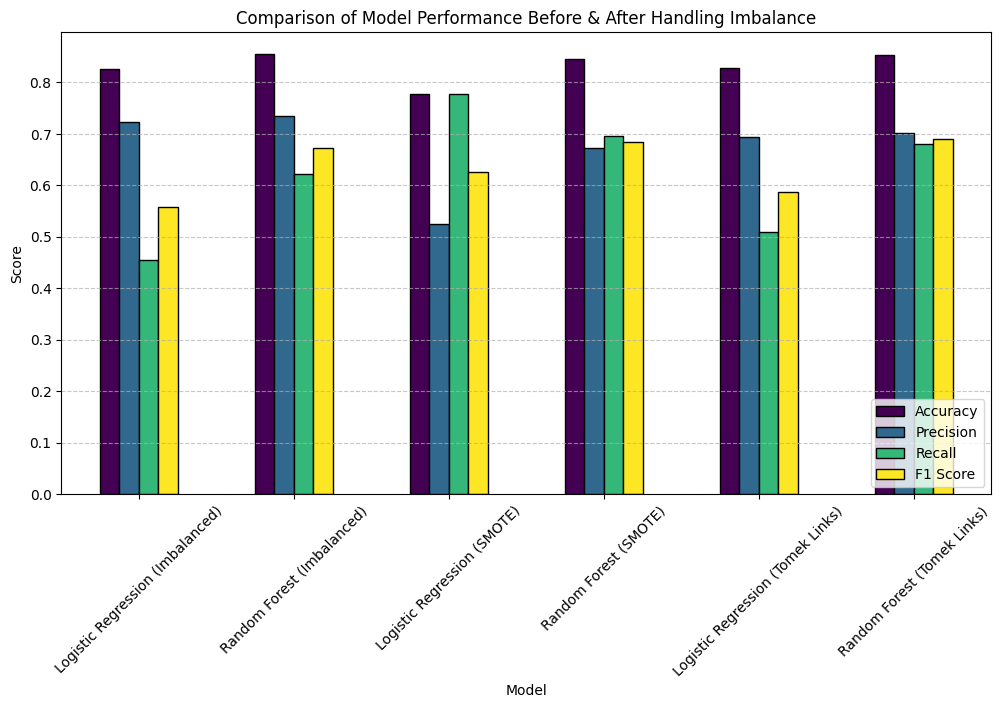

In [29]:
# bargraph for visual representation.

metrics_df.set_index("Model").plot(kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")
plt.title("Comparison of Model Performance Before & After Handling Imbalance")
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Model Performance before and after handling imbalance
#### Before Handling Imbalance the accuracy of logistic regression was 0.826808 and the accuracy of random forest was 0.854906 whcih is high but the recall values are low (0.455357 for logistic regression and 0.621173 for random forest) - recall is very low for logistic regression. 
#### precision(0.722672 for logistic regression and 0.735094 for random forest) is compratively good but the F1 scores are too low due to the class imbalance.
#### This shows that model is biased towards the majority class.

## Results after applying SMOTE
#### Recall has significantly improved to a good extent particularly for logistic regression (0.776786)
#### The F1-score has improved.(0.625899,0.684639)
#### But the accuracy has slightly decreased.(0.776447,0.845540)

## Tomek Links Results
#### Overall performance after applying tomek results is in between imbalanced dataset's and SMOTE's 
#### Recall is better than the imbalanced models but lower than SMOTE (0.509566, 0.679847)
#### F1-Score has improved (0.587284,0.690191), but precision is slightly lower than in the imbalanced models.

#### Random Forest generally outperforms Logistic Regression across all metrics.
#### SMOTE leads to significant increase in recall, which is useful when detecting the minority class.
#### Tomek improves recall in comparison with imbalanced dataset but not as effective as SMOTE
#### The best balanced model here is Random Forest with SMOTE as it has high recall while maintaining good precision and F1 score

#### Tomek lonks is not as effective as SMOTE in addressing class imbalance.
#### Random forest performs consistently good for handling class imbalance.
#### Smote is the best technique for getting good recall and overall balance of metrics.

####  Class Imabalance need to be handled because models trained on imbalanced datasets favours the majority class.

In [35]:
# Problem 2
# loading the data set
df_boston = pd.read_csv('/Users/anany/OneDrive/Desktop/SEM2/6302-machine learning/Boston.csv')
df_boston.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [36]:
# Computing the Pearson correlation coefficient matrix for the dataset
correlation_matrix = df_boston.corr()

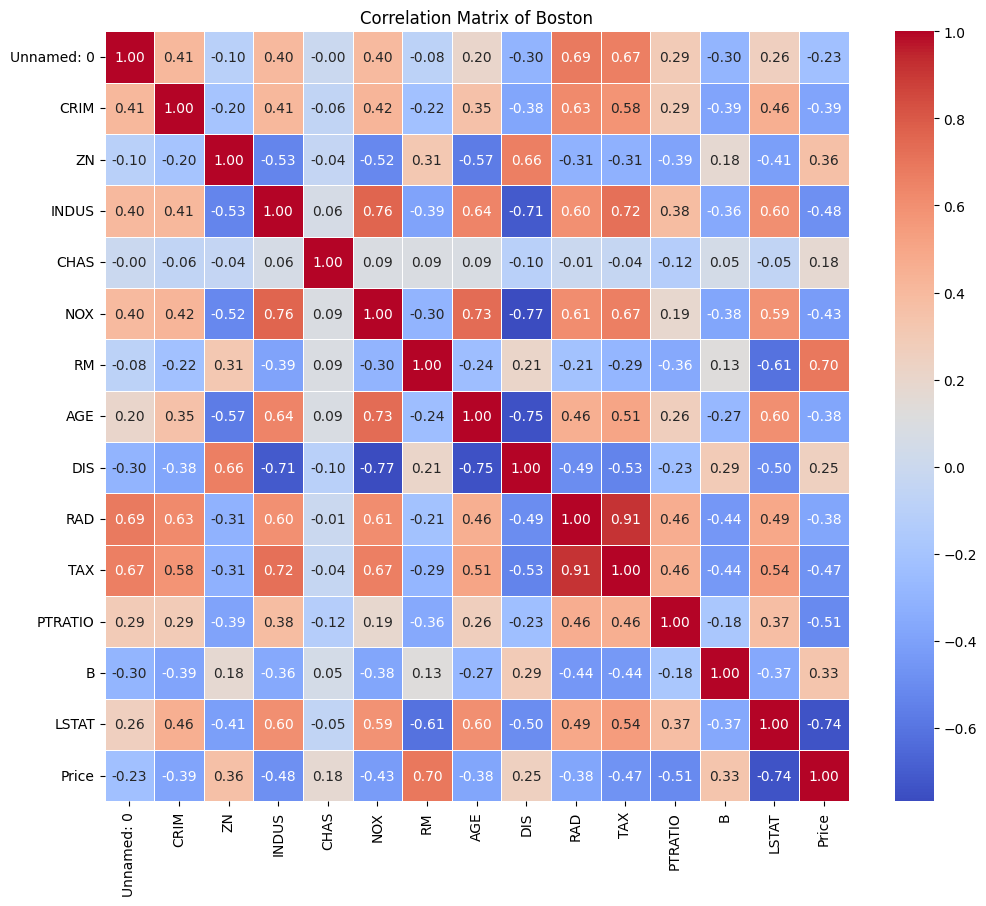

In [37]:
# creating heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Boston")
plt.show()

## Strong positive correlation
#### RAD (radial highways) and TAX (Tax Rate) have a very strong positive correlation of 0.91
#### It indicates that areas with higher accessibility to highways tend to have higher property tax rates. 
#### Shows that as connectivity increases the tax for the property also increases.

## Strong negative correlation
#### LSTAT (Lower status population) and housing price shares a strong negative correlation.
#### This indicates that as the 